In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import csv
from sklearn import metrics


In [2]:
df1=pd.read_csv("train.csv",quoting=csv.QUOTE_NONE, escapechar='\\')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903024 entries, 0 to 2903023
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   TITLE           object
 1   DESCRIPTION     object
 2   BULLET_POINTS   object
 3   BRAND           object
 4   BROWSE_NODE_ID  int64 
dtypes: int64(1), object(4)
memory usage: 110.7+ MB


In [4]:
df1.shape

(2903024, 5)

In [5]:
df1.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,"Pete The Cat Bedtime Blues Doll, 14.5 Inch","Pete the Cat is the coolest, most popular cat ...","[Pete the Cat Bedtime Blues plush doll,Based o...",MerryMakers,0
1,"The New Yorker NYHM014 Refrigerator Magnet, 2 ...",The New Yorker Handsome Cello Wrapped Hard Mag...,[Cat In A Tea Cup by New Yorker cover artist G...,The New Yorker,1
2,The Ultimate Self-Sufficiency Handbook: A Comp...,NaN,Skyhorse Publishing,imusti,2
3,Amway Nutrilite Kids Chewable Iron Tablets (100),NaN,"[Nutrilite Kids,Chewable Iron Tablets,Quantity...",Amway,3
4,Teacher Planner Company A4 6 Lesson Academic T...,NaN,NaN,NaN,4


In [6]:
df1.isnull()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,True,True,False
...,...,...,...,...,...
2903019,False,False,False,False,False
2903020,False,False,False,False,False
2903021,False,False,False,False,False
2903022,False,False,False,False,False


In [7]:
df1.isnull().sum()

TITLE                 71
DESCRIPTION       723664
BULLET_POINTS     166263
BRAND              56737
BROWSE_NODE_ID         0
dtype: int64

In [8]:
df1.columns

Index(['TITLE', 'DESCRIPTION', 'BULLET_POINTS', 'BRAND', 'BROWSE_NODE_ID'], dtype='object')

In [9]:
df1['TITLE'].value_counts()

ZEBRA BLINDS Polyester Curtain for Windows Or Outdoor Décor                                                              163
Allen Solly Men's Slim fit Casual Shirt                                                                                  145
Candere By Kalyan Jewellers 22KT Yellow Gold Ring for Women                                                              136
Candere By Kalyan Jewellers 18KT Yellow Gold and Diamond Ring for Women                                                  123
Sparx Men's Pack of 2 Casual Shoes                                                                                       110
                                                                                                                        ... 
CFS CREATIVE FRAGRANCE LADY BLUE [100ML]                                                                                   1
Aishani Gold Plated Pure Silver Long Necklace Gold Plated Jewellery Necklace for Women                                     1


In [10]:
len(df1['TITLE'].unique())

2751513

In [11]:
df1['DESCRIPTION'].value_counts()

Shengshou back covers are the best attractive accessory to make your mobile unique from other models .The Premium case is made out of a light, durable plastic called Polycarbonate.It is strong enough to protect it from bumps, drops and scratches.Wide array of designs and models.A raised bezel protects your display when mobile is laid flat, and the volume and power buttons are explicitly carved, so all buttons and ports are easily accessible. This case is 100% compatible with your regular charger and headphones. Kindly Note: **There may be slight change in color of design printed on case as seen on website, as there can be different monitors/tablets/smart phones settings**.                                                                                                                                                                                                                                                                                                                               

In [12]:
len(df1['DESCRIPTION'].unique())

1278943

In [13]:
df1.BRAND.value_counts()

Generic                      107303
Puma                          14131
United Colors of Benetton     11821
Max                           11180
US Polo Association            8570
                              ...  
OraTec                            1
creazydog                         1
Ilonish                           1
Altis Ware                        1
TORR-TO                           1
Name: BRAND, Length: 258265, dtype: int64

In [14]:
len(df1['BRAND'].unique())

258266

In [15]:
df1['BULLET_POINTS'].value_counts()

[OUT OF THE BOX DESIGNS & VIBRANT PRINT : Our collection is made by keeping in mind the rich culture and trends of our Indian country. Designs & durability of the material is top notch with high definition print quality and drop down protection.,PREMIUM QUALITY : PikkMe cases are 3D printed high quality mobile back guard,printed with high-end Korean Ink Technology.Pouches are made with premium hard Polycarbonate (plastic) material with fully matte finish for upgraded style and durability.Also they are very light weight and slim / ultra thin that perfectly fits your phone and even don’t look bulky. Note : It’s PREMIUM PLASTIC mobile back pouch and NOT silicon or rubber or fabric or leather or any other material and accessories.,ACCURATE FITTING : This cover perfectly fits your phone.These cases are made with high precision moulds covering sides and corners properly with highly accurate cut- outs for all ports and buttons.,LIFETIME WARRANTY : PikkMe provides lifetime warranty for the pri

In [16]:
len(df1['BULLET_POINTS'].unique())

1668899

In [17]:
def impute_NAN(df1, variable):
    df1[variable] = np.where(df1[variable].isnull(), "Missing", df1[variable])

In [18]:
for feature in ['TITLE', 'DESCRIPTION', 'BULLET_POINTS', 'BRAND']:
    impute_NAN(df1, feature)

In [19]:
df1.head(20)

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,"Pete The Cat Bedtime Blues Doll, 14.5 Inch","Pete the Cat is the coolest, most popular cat ...","[Pete the Cat Bedtime Blues plush doll,Based o...",MerryMakers,0
1,"The New Yorker NYHM014 Refrigerator Magnet, 2 ...",The New Yorker Handsome Cello Wrapped Hard Mag...,[Cat In A Tea Cup by New Yorker cover artist G...,The New Yorker,1
2,The Ultimate Self-Sufficiency Handbook: A Comp...,Missing,Skyhorse Publishing,imusti,2
3,Amway Nutrilite Kids Chewable Iron Tablets (100),Missing,"[Nutrilite Kids,Chewable Iron Tablets,Quantity...",Amway,3
4,Teacher Planner Company A4 6 Lesson Academic T...,Missing,Missing,Missing,4
5,Men'S Full Sleeve Raglan T-Shirts Denim T-Shir...,Men'S Full Sleeve Raglan T-Shirts Denim T-Shir...,"[Color: Blue,Sleeve: Full Sleeve,Material: Cot...",Bhavya Enterprise,5
6,Glance Women's Wallet (Black) (LW-21),This Black wallet by Glance will be a treasure...,[The Most Comfortable Women's Wallet That You ...,Glance,6
7,Wild Animals Hungry Brain Educational Flash Ca...,Wild Animals are the animals that mostly stays...,[Playful learning: Flash cards develops the lo...,hungry brain,7
8,Hindi Barakhadi Educational Flash Cards for Ki...,Hindi vowel signs and sounds are very importan...,[Playful learning: Flash cards develops the lo...,hungry brain,7
9,Chapin 1380 Premier Pro 3-Gallon Tri-Poxy Stee...,Chapin 1380 Premier Pro 3-Gallon Tri-Poxy Stee...,Missing,Chapin International,9


In [20]:
df1.isnull().sum()

TITLE             0
DESCRIPTION       0
BULLET_POINTS     0
BRAND             0
BROWSE_NODE_ID    0
dtype: int64

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903024 entries, 0 to 2903023
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   TITLE           object
 1   DESCRIPTION     object
 2   BULLET_POINTS   object
 3   BRAND           object
 4   BROWSE_NODE_ID  int64 
dtypes: int64(1), object(4)
memory usage: 110.7+ MB


In [22]:
df1.TITLE.value_counts()

ZEBRA BLINDS Polyester Curtain for Windows Or Outdoor Décor                                                              163
Allen Solly Men's Slim fit Casual Shirt                                                                                  145
Candere By Kalyan Jewellers 22KT Yellow Gold Ring for Women                                                              136
Candere By Kalyan Jewellers 18KT Yellow Gold and Diamond Ring for Women                                                  123
Sparx Men's Pack of 2 Casual Shoes                                                                                       110
                                                                                                                        ... 
CFS CREATIVE FRAGRANCE LADY BLUE [100ML]                                                                                   1
Aishani Gold Plated Pure Silver Long Necklace Gold Plated Jewellery Necklace for Women                                     1


In [23]:
df1.DESCRIPTION.value_counts()

Missing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [24]:
df1.BULLET_POINTS.value_counts()

Missing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [25]:
df1.BRAND.value_counts()

Generic                      107303
Missing                       56738
Puma                          14131
United Colors of Benetton     11821
Max                           11180
                              ...  
SKYLIGHT                          1
Handicrafts arts                  1
KENNIS DUNG CAKE                  1
MAN O KING                        1
TORR-TO                           1
Name: BRAND, Length: 258265, dtype: int64

In [26]:
strings = ['TITLE', 'DESCRIPTION', 'BULLET_POINTS', 'BRAND']

In [27]:
for feature in strings:
    print(feature, " : ", len(df1[feature].unique()), 'labels')

TITLE  :  2751513 labels
DESCRIPTION  :  1278943 labels
BULLET_POINTS  :  1668899 labels
BRAND  :  258265 labels


In [28]:
def code_frequency_encoding(df1, variable):
    variable_map = df1[variable].value_counts().to_dict()
    df1[variable] = df1[variable].map(variable_map)

In [29]:
for feature in strings:
    code_frequency_encoding(df1, feature)

In [30]:
df1.head(30)

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,1,1,1,3,0
1,1,1,1,1,1
2,1,723664,1,57,2
3,1,723664,1,52,3
4,1,723664,166263,56738,4
5,1,1,1,4,5
6,1,1,1,4,6
7,1,1,9,7,7
8,1,1,2,7,7
9,1,1,166263,22,9


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903024 entries, 0 to 2903023
Data columns (total 5 columns):
 #   Column          Dtype
---  ------          -----
 0   TITLE           int64
 1   DESCRIPTION     int64
 2   BULLET_POINTS   int64
 3   BRAND           int64
 4   BROWSE_NODE_ID  int64
dtypes: int64(5)
memory usage: 110.7 MB


In [32]:
df1.columns

Index(['TITLE', 'DESCRIPTION', 'BULLET_POINTS', 'BRAND', 'BROWSE_NODE_ID'], dtype='object')

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903024 entries, 0 to 2903023
Data columns (total 5 columns):
 #   Column          Dtype
---  ------          -----
 0   TITLE           int64
 1   DESCRIPTION     int64
 2   BULLET_POINTS   int64
 3   BRAND           int64
 4   BROWSE_NODE_ID  int64
dtypes: int64(5)
memory usage: 110.7 MB


In [34]:
df1=df1.astype({'TITLE':'int8'})
df1=df1.astype({'DESCRIPTION':'int8'})
df1=df1.astype({'BULLET_POINTS':'int8'})
df1=df1.astype({'BRAND':'int8'})

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903024 entries, 0 to 2903023
Data columns (total 5 columns):
 #   Column          Dtype
---  ------          -----
 0   TITLE           int8 
 1   DESCRIPTION     int8 
 2   BULLET_POINTS   int8 
 3   BRAND           int8 
 4   BROWSE_NODE_ID  int64
dtypes: int64(1), int8(4)
memory usage: 33.2 MB


c:\users\akhil\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\akhil\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\akhil\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

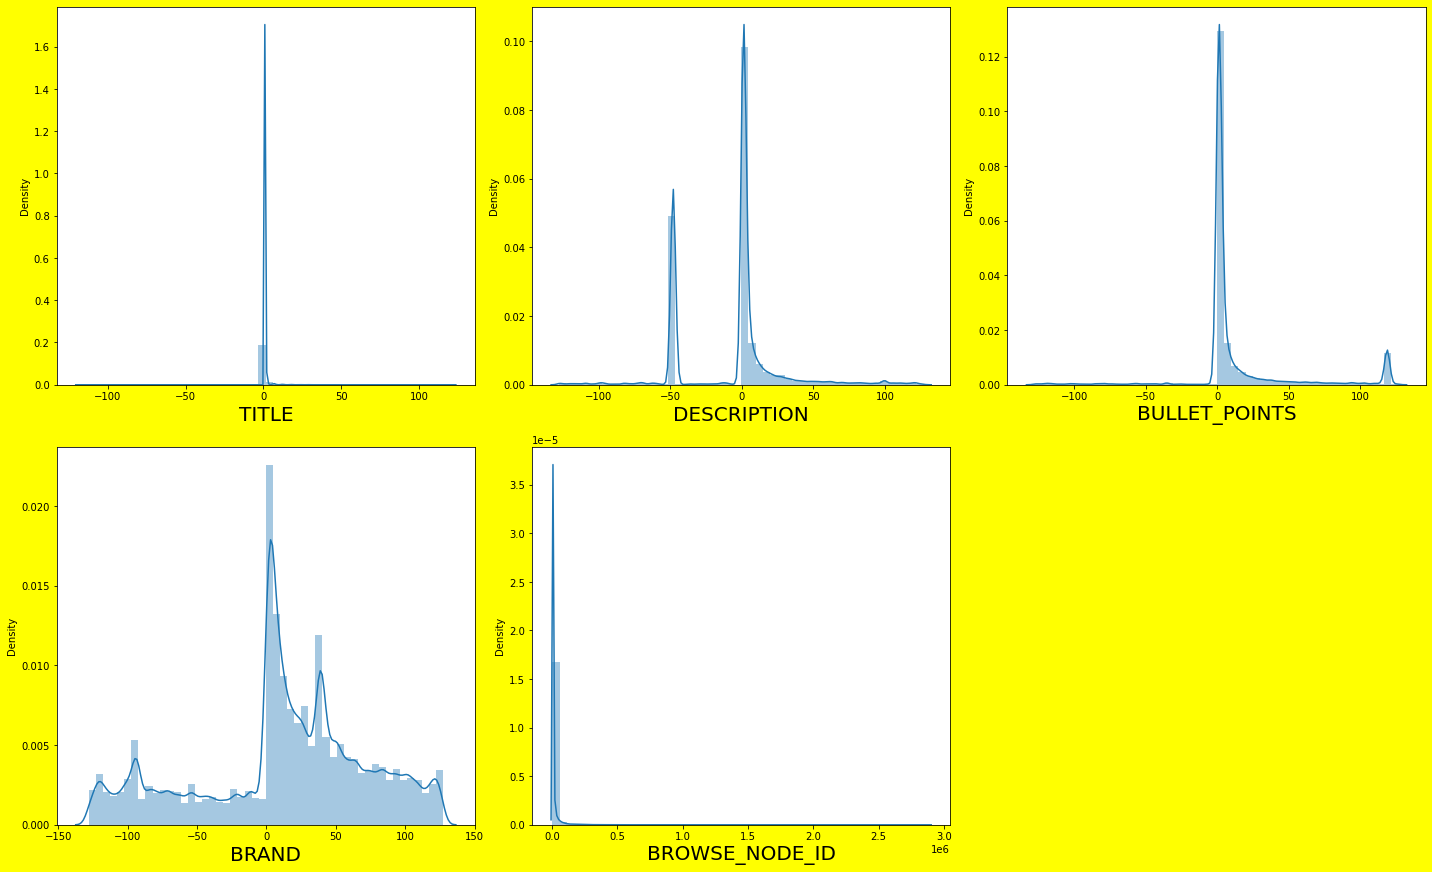

In [68]:
plt.figure(figsize=(20,30), facecolor='yellow')
plotnumber=1

for column in df1:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

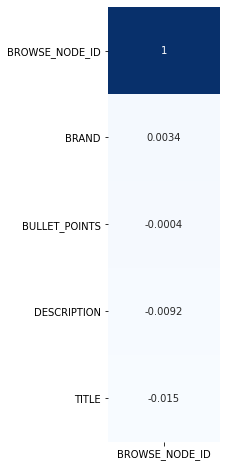

In [69]:
corr = df1.corr()['BROWSE_NODE_ID'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2,8))
sns.heatmap(corr, cmap='Blues', cbar=False, annot=True)
plt.show()

In [36]:
X=df1[strings]
X.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND
0,1,1,1,3
1,1,1,1,1
2,1,-48,1,57
3,1,-48,1,52
4,1,-48,119,-94


In [37]:
Y=df1[["BROWSE_NODE_ID"]]
Y.head()

,BROWSE_NODE_ID
0,0
1,1
2,2
3,3
4,4


In [70]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(X,Y)

C:\Users\akhil\AppData\Local\Temp/ipykernel_4644/2623009181.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ETR.fit(X,Y)


ExtraTreesRegressor()

In [71]:
print(ETR.feature_importances_)

[0.05021503 0.22324931 0.30491039 0.42162528]


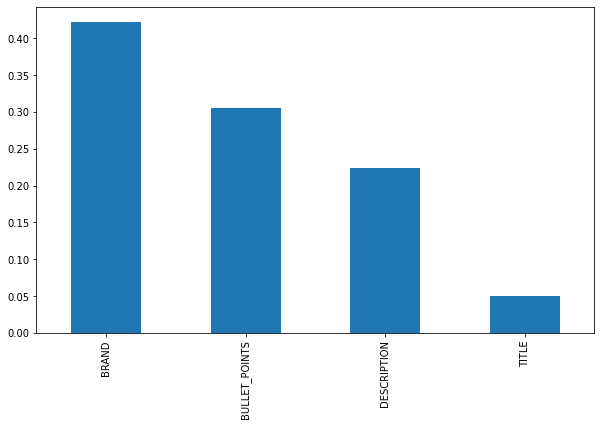

In [72]:
plt.figure(figsize = (10,6))
feat_importances = pd.Series(ETR.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='bar')
plt.show()

<AxesSubplot:>

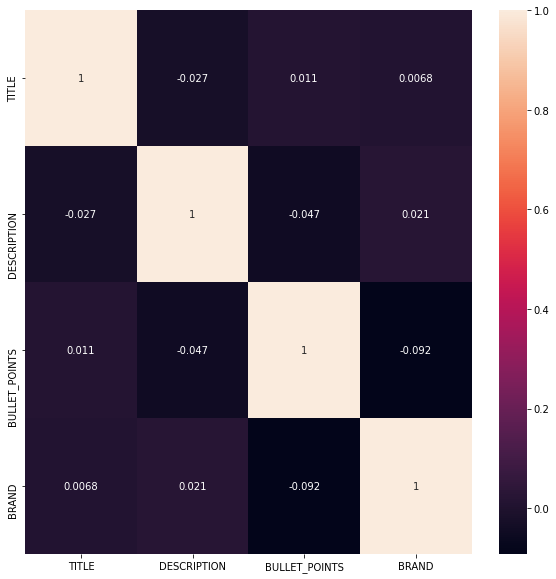

In [73]:
corr=df1.iloc[:,:-1].corr()
prop_features=corr.index
plt.figure(figsize=(10,10))
sns.heatmap(df1[prop_features].corr(),annot=True)

In [39]:
X.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND
0,1,1,1,3
1,1,1,1,1
2,1,-48,1,57
3,1,-48,1,52
4,1,-48,119,-94


In [40]:
Y.head()

,BROWSE_NODE_ID
0,0
1,1
2,2
3,3
4,4


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.9999, test_size = 0.0001, random_state = 0)

# Decision Tree

# checking max_depth_options

<AxesSubplot:>

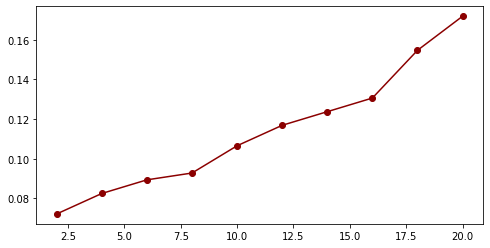

In [49]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, y_pred)
    
    #accuracy = np.mean(Y_test==Y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

## checking max_feature_option

<AxesSubplot:>

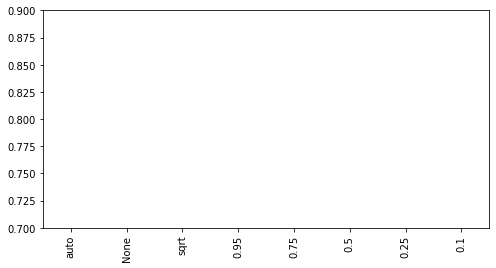

In [51]:
results = []
max_features_options = ['auto',None,'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_features_options:
    model = DecisionTreeClassifier(max_depth=20, random_state=101, max_features = trees)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, y_pred)
    
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_features_options).plot(kind="bar",color="darkred",ylim=(0.7,0.9))


## checking min_sample_leaf

<AxesSubplot:>

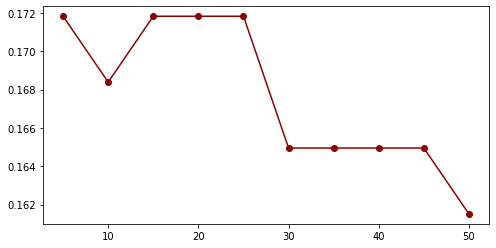

In [52]:
results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model = DecisionTreeClassifier(max_depth=20, random_state=101, max_features = None, min_samples_leaf = trees)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, min_samples_leaf_options).plot(color="darkred",marker="o")


# model training

In [53]:
dtree = DecisionTreeClassifier(max_depth=20, random_state=101, max_features = None, min_samples_leaf = 20)
dtree.fit(X_train, Y_train)
y_pred=dtree.predict(X_test)

In [54]:

accuracy = metrics.accuracy_score(Y_test, y_pred)
print("Decision tree classifier model accuracy is :",accuracy)

Decision tree classifier model accuracy is : 0.1718213058419244


In [57]:
conf_matrix=confusion_matrix(Y_test,y_pred)
class_report=classification_report(Y_test,y_pred)
print(conf_matrix)
print(class_report)

[[0 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           4       0.23      0.43      0.30         7
           5       0.13      0.38      0.19         8
          11       0.50      0.40      0.44         5
          19       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         1
          74       0.00      0.00      0.00         2
          81       0.00      0.00      0.00         3
          82       0.00      0.00      0.00         1
          86       0.00      0.00      0.00         1
          89       0.00      0.00      0.00         1
          92       0.00      0.00      0.00         0
         110       0.00      0.00      0.00         1
         112   

c:\users\akhil\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\akhil\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\akhil\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [58]:
import joblib
joblib.dump(model, 'trained_model_DTC.joblib')

['trained_model_DTC.joblib']

In [60]:
# check whether the model is able to predict or not
print(joblib.load('trained_model_DTC.joblib').predict([[196577, 772454, 889445, 13827]]))

[811]


In [61]:
# reading the test.csv file
testing =pd.read_csv("test.csv",quoting=csv.QUOTE_NONE, escapechar='\\')
testing.shape

(110775, 5)

In [62]:
# checking whether there is any null value or not 
testing.isnull().any()

PRODUCT_ID       False
TITLE             True
DESCRIPTION       True
BULLET_POINTS     True
BRAND             True
dtype: bool

In [63]:
# replacing all the null values by 'U'
testing['TITLE'].fillna('U', inplace=True)
testing['DESCRIPTION'].fillna('U', inplace=True)
testing['BULLET_POINTS'].fillna('U', inplace=True)
testing['BRAND'].fillna('U', inplace=True)

In [64]:
# Encode labels in columns so that the format of training and testing data match
from sklearn.preprocessing import LabelEncoder
label_encoders=LabelEncoder()
testing['TITLE']= label_encoders.fit_transform(testing['TITLE']) 
testing['DESCRIPTION']= label_encoders.fit_transform(testing['DESCRIPTION']) 
testing['BULLET_POINTS']= label_encoders.fit_transform(testing['BULLET_POINTS']) 
testing['BRAND']= label_encoders.fit_transform(testing['BRAND']) 
tests = testing.drop(columns = ['PRODUCT_ID'])

In [65]:
# check the accuracy of model
preds = model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, preds)
print(accuracy)

0.16151202749140894


In [66]:
# predictions is an array, which will store the output('BROWSE_NODE_ID') of the given test.csv file
predictions = model.predict(tests)
print(predictions)

[811 811 811 ... 811 811 811]


In [67]:
# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(data=predictions)

# Save prediction_df to csv file
prediction_df.to_csv('submission_DTC.csv')